In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rc('font',family='malgun gothic')
plt.rc('axes',unicode_minus=False)
import seaborn as sns

# EDA
import klib

# Preprocessing&Feature Engineering
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, RobustScaler, MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile
from gensim.models import word2vec

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from bayes_opt import BayesianOptimization
import kerastuner as kt

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, ARDRegression, BayesianRidge, Lars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from vecstack import StackingTransformer
from vecstack import stacking

# Eveluation
from sklearn.metrics import mean_squared_error # squared=False시 RMSE
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean
import pickle

### Read Data

In [2]:
df_train = pd.read_csv(os.path.abspath("../input")+'/X_train.csv', encoding='cp949')
y_train = pd.read_csv(os.path.abspath("../input")+'/y_train.csv', encoding='cp949').set_index('custid')
df_test = pd.read_csv(os.path.abspath("../input")+'/X_test.csv', encoding='cp949')
test_id = df_test['custid'].unique()

In [3]:
x_train, x_dev, y_train, y_dev, x_test, ID_test = pd.read_pickle(os.path.abspath("../input")+'/2nd_data.pkl')

In [4]:
x_train = np.concatenate((x_train,x_dev))
y_train = np.concatenate((y_train,y_dev))

### Model Tuning

In [5]:
x_train2, x_dev, y_train2, y_dev = train_test_split(x_train, y_train, test_size=0.3, random_state=0)

In [6]:
pbounds = {
    'alpha':(0,50)
}
def rid_opt(alpha):
    params = {
        'alpha':alpha
    }
    rid = Ridge(random_state=0, **params)
    rid.fit(x_train2,y_train2)
    score = mean_squared_error(rid.predict(x_dev),y_dev,squared=False)
    return -score
BO_rid = BayesianOptimization(rid_opt, pbounds, random_state=0)
BO_rid.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -8.396    |  27.44    |
|  2        | -8.395    |  35.76    |
|  3        | -8.396    |  30.14    |
|  4        | -8.396    |  27.24    |
|  5        | -8.398    |  21.18    |
|  6        | -8.395    |  32.29    |
|  7        | -8.398    |  21.88    |
|  8        | -8.394    |  44.59    |
|  9        | -8.394    |  48.18    |
|  10       | -8.399    |  19.17    |
|  11       | -8.395    |  39.59    |
|  12       | -8.396    |  26.44    |
|  13       | -8.396    |  28.4     |
|  14       | -8.394    |  46.28    |
|  15       | -8.415    |  3.552    |
|  16       | -8.413    |  4.356    |
|  17       | -8.421    |  1.011    |
|  18       | -8.394    |  41.63    |
|  19       | -8.395    |  38.91    |
|  20       | -8.394    |  43.5     |
|  21       | -8.395    |  48.93    |
|  22       | -8.395    |  39.96    |
|  23       | -8.397    |  23.07    |
|  24       | -8.395    |  39.03    |
|  25       

In [7]:
pbounds = {
    'alpha':(0,50)
}
def las_opt(alpha):
    params = {
        'alpha':alpha
    }
    las = Lasso(random_state=0, **params)
    las.fit(x_train2,y_train2)
    score = mean_squared_error(las.predict(x_dev),y_dev,squared=False)
    return -score
BO_las = BayesianOptimization(las_opt, pbounds, random_state=0)
BO_las.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -10.37    |  27.44    |
|  2        | -10.37    |  35.76    |
|  3        | -10.37    |  30.14    |
|  4        | -10.37    |  27.24    |
|  5        | -10.37    |  21.18    |
|  6        | -10.37    |  32.29    |
|  7        | -10.37    |  21.88    |
|  8        | -10.37    |  44.59    |
|  9        | -10.37    |  48.18    |
|  10       | -10.37    |  19.17    |
|  11       | -10.37    |  39.59    |
|  12       | -10.37    |  26.44    |
|  13       | -10.37    |  28.4     |
|  14       | -10.37    |  46.28    |
|  15       | -10.37    |  3.552    |
|  16       | -10.37    |  4.356    |
|  17       | -9.274    |  1.011    |
|  18       | -10.37    |  41.63    |
|  19       | -10.37    |  38.91    |
|  20       | -10.37    |  43.5     |
|  21       | -10.37    |  48.93    |
|  22       | -10.37    |  39.96    |
|  23       | -10.37    |  23.07    |
|  24       | -10.37    |  39.03    |
|  25       

In [8]:
pbounds = {
    'alpha':(0,50)
}
def ela_opt(alpha):
    params = {
        'alpha':alpha
    }
    ela = ElasticNet(random_state=0, **params)
    ela.fit(x_train2,y_train2)
    score = mean_squared_error(ela.predict(x_dev),y_dev,squared=False)
    return -score
BO_ela = BayesianOptimization(ela_opt, pbounds, random_state=0)
BO_ela.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -10.37    |  27.44    |
|  2        | -10.37    |  35.76    |
|  3        | -10.37    |  30.14    |
|  4        | -10.37    |  27.24    |
|  5        | -10.37    |  21.18    |
|  6        | -10.37    |  32.29    |
|  7        | -10.37    |  21.88    |
|  8        | -10.37    |  44.59    |
|  9        | -10.37    |  48.18    |
|  10       | -10.37    |  19.17    |
|  11       | -10.37    |  39.59    |
|  12       | -10.37    |  26.44    |
|  13       | -10.37    |  28.4     |
|  14       | -10.37    |  46.28    |
|  15       | -9.946    |  3.552    |
|  16       | -10.15    |  4.356    |
|  17       | -9.007    |  1.011    |
|  18       | -10.37    |  41.63    |
|  19       | -10.37    |  38.91    |
|  20       | -10.37    |  43.5     |
|  21       | -10.37    |  48.93    |
|  22       | -10.37    |  39.96    |
|  23       | -10.37    |  23.07    |
|  24       | -10.37    |  39.03    |
|  25       

In [9]:
pbounds = {
    'n_iter':(100,1000),
    'alpha_1':(0,50),
    'alpha_2':(0,50),
    'lambda_1':(0,10),
    'lambda_2':(0,10)
}
def ard_opt(n_iter,alpha_1,alpha_2,lambda_1,lambda_2):
    params = {
        'n_iter':int(round(n_iter)),
        'alpha_1':alpha_1,
        'alpha_2':alpha_2,
        'lambda_1':lambda_1,
        'lambda_2':lambda_2
    }
    ard = ARDRegression(**params)
    ard.fit(x_train2,y_train2)
    score = mean_squared_error(ard.predict(x_dev),y_dev,squared=False)
    return -score
BO_ard = BayesianOptimization(ard_opt, pbounds, random_state=0)
BO_ard.maximize(init_points=50, n_iter=50) # init_points: exploration, n_iter: iteration

|   iter    |  target   |  alpha_1  |  alpha_2  | lambda_1  | lambda_2  |  n_iter   |
-------------------------------------------------------------------------------------
|  1        | -8.393    |  27.44    |  35.76    |  6.028    |  5.449    |  481.3    |
|  2        | -8.393    |  32.29    |  21.88    |  8.918    |  9.637    |  445.1    |
|  3        | -8.394    |  39.59    |  26.44    |  5.68     |  9.256    |  163.9    |
|  4        | -8.394    |  4.356    |  1.011    |  8.326    |  7.782    |  883.0    |
|  5        | -8.394    |  48.93    |  39.96    |  4.615    |  7.805    |  206.4    |
|  6        | -8.398    |  32.0     |  7.168    |  9.447    |  5.218    |  473.2    |
|  7        | -8.393    |  13.23    |  38.71    |  4.562    |  5.684    |  116.9    |
|  8        | -8.393    |  30.88    |  30.6     |  6.169    |  9.437    |  713.6    |
|  9        | -8.436    |  17.98    |  21.85    |  6.976    |  0.6023   |  700.1    |
|  10       | -8.397    |  33.53    |  10.52    |  1.2

|  58       | -8.397    |  10.78    |  23.56    |  9.394    |  5.707    |  885.7    |
|  59       | -8.393    |  38.29    |  38.25    |  6.441    |  6.838    |  541.5    |
|  60       | -8.393    |  19.5     |  47.7     |  7.475    |  8.007    |  530.0    |
|  61       | -8.397    |  8.404    |  33.48    |  8.763    |  5.031    |  503.0    |
|  62       | -8.394    |  44.14    |  17.25    |  2.339    |  0.7851   |  635.0    |
|  63       | -8.397    |  13.14    |  45.9     |  9.824    |  5.962    |  555.8    |
|  64       | -8.393    |  36.82    |  49.19    |  8.256    |  9.835    |  511.7    |
|  65       | -8.394    |  48.59    |  4.667    |  9.812    |  8.187    |  340.7    |
|  66       | -8.394    |  35.35    |  33.32    |  10.0     |  10.0     |  730.1    |
|  67       | -8.475    |  49.23    |  26.16    |  9.367    |  0.08617  |  522.2    |
|  68       | -8.418    |  19.2     |  9.596    |  0.0      |  10.0     |  547.3    |
|  69       | -8.418    |  14.77    |  33.8     |  0.0

In [10]:
pbounds = {
    'n_iter':(100,1000),
    'alpha_1':(0,50),
    'alpha_2':(0,50),
    'lambda_1':(0,10),
    'lambda_2':(0,10)
}
def bay_opt(n_iter,alpha_1,alpha_2,lambda_1,lambda_2):
    params = {
        'n_iter':int(round(n_iter)),
        'alpha_1':alpha_1,
        'alpha_2':alpha_2,
        'lambda_1':lambda_1,
        'lambda_2':lambda_2
    }
    bay = BayesianRidge(**params)
    bay.fit(x_train2,y_train2)
    score = mean_squared_error(bay.predict(x_dev),y_dev,squared=False)
    return -score
BO_bay = BayesianOptimization(bay_opt, pbounds, random_state=0)
BO_bay.maximize(init_points=50, n_iter=50)

|   iter    |  target   |  alpha_1  |  alpha_2  | lambda_1  | lambda_2  |  n_iter   |
-------------------------------------------------------------------------------------
|  1        | -8.416    |  27.44    |  35.76    |  6.028    |  5.449    |  481.3    |
|  2        | -8.413    |  32.29    |  21.88    |  8.918    |  9.637    |  445.1    |
|  3        | -8.412    |  39.59    |  26.44    |  5.68     |  9.256    |  163.9    |
|  4        | -8.414    |  4.356    |  1.011    |  8.326    |  7.782    |  883.0    |
|  5        | -8.412    |  48.93    |  39.96    |  4.615    |  7.805    |  206.4    |
|  6        | -8.418    |  32.0     |  7.168    |  9.447    |  5.218    |  473.2    |
|  7        | -8.415    |  13.23    |  38.71    |  4.562    |  5.684    |  116.9    |
|  8        | -8.412    |  30.88    |  30.6     |  6.169    |  9.437    |  713.6    |
|  9        | -8.425    |  17.98    |  21.85    |  6.976    |  0.6023   |  700.1    |
|  10       | -8.416    |  33.53    |  10.52    |  1.2

|  58       | -8.418    |  42.53    |  44.07    |  9.533    |  4.852    |  765.3    |
|  59       | -8.415    |  0.2782   |  35.8     |  4.753    |  5.738    |  667.4    |
|  60       | -8.414    |  30.3     |  45.02    |  1.963    |  5.088    |  918.7    |
|  61       | -8.42     |  20.4     |  31.17    |  7.575    |  3.315    |  931.2    |
|  62       | -8.414    |  48.55    |  40.34    |  5.375    |  6.504    |  207.1    |
|  63       | -8.416    |  19.23    |  16.46    |  5.857    |  5.116    |  766.6    |
|  64       | -8.411    |  23.99    |  7.793    |  4.184    |  9.632    |  771.7    |
|  65       | -8.41     |  25.46    |  2.549    |  0.7985   |  8.704    |  759.5    |
|  66       | -8.413    |  23.76    |  3.344    |  9.262    |  9.682    |  765.3    |
|  67       | -8.409    |  20.16    |  2.68     |  0.2612   |  9.494    |  766.0    |
|  68       | -8.412    |  41.32    |  34.64    |  0.105    |  6.166    |  762.9    |
|  69       | -8.418    |  23.96    |  0.9625   |  0.0

In [12]:
pbounds = {
    'n_estimators':(100,1000),
    'learning_rate':(0.0000000000000000000001,1),
    'max_depth':(2, 32),
    'num_leaves':(2, 64),
    'min_child_samples':(10, 200),
    'min_child_weight':(1, 50),
    'subsample':(0.5, 1),
    'colsample_bytree':(0.5, 1),
    'max_bin':(10, 500),
    'reg_lambda':(0.001, 10),
    'reg_alpha':(0.01, 50)
}
def lgbm_opt(n_estimators, learning_rate, max_depth, num_leaves, min_child_samples, min_child_weight,
             subsample, colsample_bytree, max_bin, reg_lambda, reg_alpha):
    params = {
        "n_estimators":int(round(n_estimators)), 
        "learning_rate":learning_rate,
        'max_depth':int(round(max_depth)),
        'num_leaves':int(round(num_leaves)),
        'min_child_samples': int(round(min_child_samples)),
        'min_child_weight': int(round(min_child_weight)),
        'subsample':max(min(subsample, 1), 0),
        'colsample_bytree':max(min(colsample_bytree, 1), 0),
        'reg_lambda': reg_lambda,
        'reg_alpha': reg_alpha
    }
    lgbm = LGBMRegressor(random_state=0, **params)
    lgbm.fit(x_train2,y_train2)
    score = mean_squared_error(lgbm.predict(x_dev),y_dev,squared=False)
    return -score
BO_lgbm = BayesianOptimization(lgbm_opt, pbounds, random_state=0)
BO_lgbm.maximize(init_points=50, n_iter=50)

|   iter    |  target   | colsam... | learni... |  max_bin  | max_depth | min_ch... | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        | -9.94     |  0.7744   |  0.7152   |  305.4    |  18.35    |  90.49    |  32.65    |  493.8    |  57.29    |  48.18    |  3.835    |  0.8959   |
|  2        | -9.336    |  0.7644   |  0.568    |  463.5    |  4.131    |  26.55    |  1.991    |  849.4    |  50.25    |  43.5     |  9.786    |  0.8996   |
|  3        | -10.31    |  0.7307   |  0.7805   |  67.95    |  21.2     |  37.24    |  47.29    |  569.7    |  27.71    |  13.24    |  7.743    |  0.7281   |
|  4        | -8.149    |  0.7842   |  0.01879  |  312.6    |  20.36    |  127.2    |  47.24    |  713.6    |  24.29    |  21.86    |  6.977    |  0.5301   |
|  5        | -9.733    |  0.8334   |  0.6706   |  1

|  31       | -10.14    |  0.5906   |  0.7885   |  37.86    |  22.91    |  158.0    |  39.09    |  333.5    |  25.18    |  29.38    |  2.729    |  0.6854   |
|  32       | -9.13     |  0.5985   |  0.4599   |  31.86    |  25.99    |  24.62    |  26.42    |  376.1    |  37.81    |  47.97    |  6.456    |  0.5177   |
|  33       | -9.39     |  0.7152   |  0.51     |  272.7    |  22.44    |  62.74    |  7.314    |  453.4    |  61.3     |  9.365    |  9.04     |  0.7719   |
|  34       | -10.63    |  0.7285   |  0.882    |  234.7    |  23.73    |  85.81    |  45.3     |  721.0    |  45.38    |  16.39    |  7.568    |  0.818    |
|  35       | -8.421    |  0.62     |  0.1605   |  400.2    |  30.77    |  97.05    |  29.96    |  872.0    |  30.35    |  47.59    |  5.758    |  0.9104   |
|  36       | -10.34    |  0.9544   |  0.8155   |  88.11    |  20.87    |  85.7     |  4.073    |  481.6    |  18.04    |  42.45    |  0.334    |  0.9795   |
|  37       | -8.742    |  0.6777   |  0.3567   |  1

|  63       | -9.802    |  0.9796   |  0.7223   |  51.32    |  3.758    |  101.6    |  24.2     |  847.7    |  61.99    |  40.38    |  9.155    |  0.6278   |
|  64       | -9.987    |  0.7356   |  0.7135   |  488.5    |  9.391    |  58.16    |  3.945    |  808.2    |  13.75    |  29.08    |  0.3623   |  0.826    |
|  65       | -8.916    |  0.6494   |  0.3711   |  95.2     |  27.03    |  59.61    |  27.15    |  750.1    |  56.99    |  48.03    |  2.136    |  0.9709   |
|  66       | -10.59    |  0.6605   |  0.8269   |  21.69    |  6.07     |  103.9    |  48.36    |  448.1    |  25.99    |  15.68    |  2.526    |  0.9264   |
|  67       | -8.824    |  0.7637   |  0.001914 |  312.3    |  19.34    |  121.8    |  43.99    |  714.1    |  22.72    |  17.79    |  7.101    |  0.7602   |
|  68       | -8.509    |  0.6773   |  0.2712   |  38.97    |  10.57    |  131.4    |  7.819    |  288.2    |  13.94    |  29.63    |  9.091    |  0.5968   |
|  69       | -9.824    |  0.6716   |  0.6738   |  2

|  95       | -10.37    |  0.9559   |  1e-22    |  391.4    |  7.562    |  21.26    |  4.97     |  709.2    |  21.22    |  30.84    |  8.893    |  0.9734   |
|  96       | -8.824    |  0.5663   |  0.3277   |  285.1    |  26.67    |  118.4    |  29.2     |  683.6    |  39.87    |  42.44    |  6.335    |  0.6376   |
|  97       | -10.25    |  0.6791   |  0.7894   |  297.4    |  14.82    |  37.22    |  12.59    |  895.9    |  38.48    |  16.15    |  5.271    |  0.9826   |
|  98       | -9.143    |  0.6166   |  0.4523   |  24.02    |  5.59     |  93.81    |  8.643    |  325.7    |  27.52    |  18.51    |  0.3086   |  0.5183   |
|  99       | -9.737    |  0.6984   |  0.6325   |  419.0    |  9.997    |  187.6    |  27.5     |  982.0    |  48.23    |  25.89    |  2.976    |  0.7618   |
|  100      | -8.306    |  0.5111   |  0.09371  |  312.9    |  14.69    |  45.71    |  17.27    |  889.0    |  39.94    |  18.38    |  8.042    |  0.7371   |


In [13]:
max_params_rid = BO_rid.max['params']
max_params_las = BO_las.max['params']
max_params_ela = BO_ela.max['params']
max_params_ard = BO_ard.max['params']
max_params_bay = BO_bay.max['params']
max_params_lgbm = BO_lgbm.max['params']

In [14]:
max_params_ard['n_iter'] = int(round(max_params_ard['n_iter']))

max_params_bay['n_iter'] = int(round(max_params_bay['n_iter']))

max_params_lgbm['num_leaves'] = int(round(max_params_lgbm['num_leaves']))
max_params_lgbm['n_estimators'] = int(round(max_params_lgbm['n_estimators']))
max_params_lgbm['max_depth'] = int(round(max_params_lgbm['max_depth']))
max_params_lgbm['min_child_samples'] = int(round(max_params_lgbm['min_child_samples']))
max_params_lgbm['min_child_weight'] = int(round(max_params_lgbm['min_child_weight']))
max_params_lgbm['max_bin'] = int(round(max_params_lgbm['max_bin']))
max_params_lgbm['subsample'] = max(min(max_params_lgbm['subsample'], 1), 0)
max_params_lgbm['colsample_bytree'] = max(min(max_params_lgbm['colsample_bytree'], 1), 0)

In [15]:
print(max_params_rid,'\n',max_params_las,'\n',max_params_ela,'\n',max_params_ard,'\n',max_params_bay,'\n',max_params_lgbm)

{'alpha': 44.4808733560013} 
 {'alpha': 0.9394900218177571} 
 {'alpha': 0.9394900218177571} 
 {'alpha_1': 19.802985140364687, 'alpha_2': 28.27106559292545, 'lambda_1': 1.8327983621407862, 'lambda_2': 1.4484775934337724, 'n_iter': 539} 
 {'alpha_1': 39.11565669532823, 'alpha_2': 43.39573612372127, 'lambda_1': 0.0, 'lambda_2': 10.0, 'n_iter': 763} 
 {'colsample_bytree': 0.7842169744343243, 'learning_rate': 0.018789800436355142, 'max_bin': 313, 'max_depth': 20, 'min_child_samples': 127, 'min_child_weight': 47, 'n_estimators': 714, 'num_leaves': 24, 'reg_alpha': 21.857227370429083, 'reg_lambda': 6.976614328076722, 'subsample': 0.5301127358146349}


In [16]:
regs_tuned = [Ridge(random_state=0, **max_params_rid),Lasso(random_state=0, **max_params_las),ElasticNet(random_state=0, **max_params_ela),
             ARDRegression(**max_params_ard),BayesianRidge(**max_params_bay),LGBMRegressor(random_state=0,**max_params_lgbm),CatBoostRegressor(random_state=0)]
regs_tuned = [(str(reg).split('(')[0], reg) for reg in regs_tuned]
regs_tuned[-1] = list(regs_tuned[-1])
regs_tuned[-1][0] = 'CatBoostRegressor'
regs_tuned[-1] = tuple(regs_tuned[-1])

regs_trained = [(name, reg.fit(x_train2,y_train2), float(mean_squared_error(reg.predict(x_dev),y_dev,squared=False))) 
                    for name, reg in tqdm(regs_tuned.copy())]

 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:24<00:07,  7.21s/it]

Learning rate set to 0.063286
0:	learn: 10.3150603	total: 188ms	remaining: 3m 7s
1:	learn: 10.1874956	total: 236ms	remaining: 1m 57s
2:	learn: 10.0666411	total: 278ms	remaining: 1m 32s
3:	learn: 9.9580758	total: 318ms	remaining: 1m 19s
4:	learn: 9.8628163	total: 359ms	remaining: 1m 11s
5:	learn: 9.7744411	total: 399ms	remaining: 1m 6s
6:	learn: 9.6910973	total: 438ms	remaining: 1m 2s
7:	learn: 9.6084187	total: 482ms	remaining: 59.8s
8:	learn: 9.5374135	total: 522ms	remaining: 57.4s
9:	learn: 9.4630635	total: 562ms	remaining: 55.7s
10:	learn: 9.3958867	total: 602ms	remaining: 54.1s
11:	learn: 9.3399673	total: 641ms	remaining: 52.8s
12:	learn: 9.2856493	total: 680ms	remaining: 51.7s
13:	learn: 9.2326767	total: 723ms	remaining: 50.9s
14:	learn: 9.1862705	total: 763ms	remaining: 50.1s
15:	learn: 9.1447970	total: 804ms	remaining: 49.4s
16:	learn: 9.1035389	total: 843ms	remaining: 48.8s
17:	learn: 9.0610081	total: 885ms	remaining: 48.3s
18:	learn: 9.0212287	total: 925ms	remaining: 47.8s
19:	

163:	learn: 7.8598452	total: 7.4s	remaining: 37.7s
164:	learn: 7.8553723	total: 7.44s	remaining: 37.6s
165:	learn: 7.8512836	total: 7.48s	remaining: 37.6s
166:	learn: 7.8472933	total: 7.53s	remaining: 37.6s
167:	learn: 7.8426574	total: 7.58s	remaining: 37.5s
168:	learn: 7.8378495	total: 7.65s	remaining: 37.6s
169:	learn: 7.8346532	total: 7.7s	remaining: 37.6s
170:	learn: 7.8295431	total: 7.75s	remaining: 37.6s
171:	learn: 7.8257960	total: 7.8s	remaining: 37.6s
172:	learn: 7.8205713	total: 7.85s	remaining: 37.5s
173:	learn: 7.8145365	total: 7.9s	remaining: 37.5s
174:	learn: 7.8091128	total: 7.95s	remaining: 37.5s
175:	learn: 7.8052141	total: 7.99s	remaining: 37.4s
176:	learn: 7.7988002	total: 8.04s	remaining: 37.4s
177:	learn: 7.7940469	total: 8.08s	remaining: 37.3s
178:	learn: 7.7892814	total: 8.13s	remaining: 37.3s
179:	learn: 7.7850536	total: 8.17s	remaining: 37.2s
180:	learn: 7.7818006	total: 8.21s	remaining: 37.2s
181:	learn: 7.7759707	total: 8.26s	remaining: 37.1s
182:	learn: 7.77

325:	learn: 7.1837412	total: 14.6s	remaining: 30.1s
326:	learn: 7.1786957	total: 14.6s	remaining: 30.1s
327:	learn: 7.1749051	total: 14.7s	remaining: 30s
328:	learn: 7.1702255	total: 14.7s	remaining: 30s
329:	learn: 7.1671849	total: 14.8s	remaining: 30s
330:	learn: 7.1642692	total: 14.8s	remaining: 29.9s
331:	learn: 7.1593401	total: 14.8s	remaining: 29.9s
332:	learn: 7.1564741	total: 14.9s	remaining: 29.8s
333:	learn: 7.1514620	total: 14.9s	remaining: 29.8s
334:	learn: 7.1487305	total: 15s	remaining: 29.7s
335:	learn: 7.1451691	total: 15s	remaining: 29.7s
336:	learn: 7.1412625	total: 15.1s	remaining: 29.6s
337:	learn: 7.1368011	total: 15.1s	remaining: 29.6s
338:	learn: 7.1339240	total: 15.2s	remaining: 29.6s
339:	learn: 7.1309953	total: 15.2s	remaining: 29.5s
340:	learn: 7.1257504	total: 15.3s	remaining: 29.5s
341:	learn: 7.1219120	total: 15.3s	remaining: 29.4s
342:	learn: 7.1173933	total: 15.3s	remaining: 29.4s
343:	learn: 7.1137219	total: 15.4s	remaining: 29.3s
344:	learn: 7.1102037	

485:	learn: 6.6625055	total: 21.6s	remaining: 22.9s
486:	learn: 6.6596327	total: 21.7s	remaining: 22.9s
487:	learn: 6.6565339	total: 21.7s	remaining: 22.8s
488:	learn: 6.6523000	total: 21.8s	remaining: 22.8s
489:	learn: 6.6497748	total: 21.8s	remaining: 22.7s
490:	learn: 6.6461182	total: 21.9s	remaining: 22.7s
491:	learn: 6.6427018	total: 21.9s	remaining: 22.6s
492:	learn: 6.6401252	total: 22s	remaining: 22.6s
493:	learn: 6.6378969	total: 22s	remaining: 22.5s
494:	learn: 6.6348421	total: 22s	remaining: 22.5s
495:	learn: 6.6324631	total: 22.1s	remaining: 22.4s
496:	learn: 6.6291053	total: 22.1s	remaining: 22.4s
497:	learn: 6.6263739	total: 22.2s	remaining: 22.4s
498:	learn: 6.6235743	total: 22.2s	remaining: 22.3s
499:	learn: 6.6202670	total: 22.3s	remaining: 22.3s
500:	learn: 6.6173979	total: 22.3s	remaining: 22.2s
501:	learn: 6.6138182	total: 22.4s	remaining: 22.2s
502:	learn: 6.6102899	total: 22.4s	remaining: 22.1s
503:	learn: 6.6077243	total: 22.4s	remaining: 22.1s
504:	learn: 6.6049

647:	learn: 6.2042683	total: 28.8s	remaining: 15.7s
648:	learn: 6.2005040	total: 28.9s	remaining: 15.6s
649:	learn: 6.1977014	total: 28.9s	remaining: 15.6s
650:	learn: 6.1954159	total: 29s	remaining: 15.5s
651:	learn: 6.1924304	total: 29s	remaining: 15.5s
652:	learn: 6.1890959	total: 29.1s	remaining: 15.4s
653:	learn: 6.1871033	total: 29.1s	remaining: 15.4s
654:	learn: 6.1846844	total: 29.2s	remaining: 15.4s
655:	learn: 6.1822547	total: 29.2s	remaining: 15.3s
656:	learn: 6.1795628	total: 29.3s	remaining: 15.3s
657:	learn: 6.1768767	total: 29.3s	remaining: 15.2s
658:	learn: 6.1739516	total: 29.3s	remaining: 15.2s
659:	learn: 6.1696351	total: 29.4s	remaining: 15.1s
660:	learn: 6.1662721	total: 29.4s	remaining: 15.1s
661:	learn: 6.1641539	total: 29.5s	remaining: 15s
662:	learn: 6.1606236	total: 29.5s	remaining: 15s
663:	learn: 6.1574587	total: 29.6s	remaining: 15s
664:	learn: 6.1544041	total: 29.6s	remaining: 14.9s
665:	learn: 6.1505812	total: 29.7s	remaining: 14.9s
666:	learn: 6.1475179	

811:	learn: 5.7810863	total: 36.2s	remaining: 8.38s
812:	learn: 5.7785925	total: 36.3s	remaining: 8.34s
813:	learn: 5.7763911	total: 36.3s	remaining: 8.29s
814:	learn: 5.7736224	total: 36.3s	remaining: 8.25s
815:	learn: 5.7711581	total: 36.4s	remaining: 8.21s
816:	learn: 5.7690121	total: 36.4s	remaining: 8.16s
817:	learn: 5.7663938	total: 36.5s	remaining: 8.12s
818:	learn: 5.7634442	total: 36.5s	remaining: 8.07s
819:	learn: 5.7604897	total: 36.6s	remaining: 8.03s
820:	learn: 5.7577090	total: 36.6s	remaining: 7.98s
821:	learn: 5.7548624	total: 36.7s	remaining: 7.94s
822:	learn: 5.7524007	total: 36.7s	remaining: 7.9s
823:	learn: 5.7488724	total: 36.8s	remaining: 7.85s
824:	learn: 5.7467016	total: 36.8s	remaining: 7.81s
825:	learn: 5.7441989	total: 36.9s	remaining: 7.76s
826:	learn: 5.7419317	total: 36.9s	remaining: 7.72s
827:	learn: 5.7390620	total: 37s	remaining: 7.68s
828:	learn: 5.7363264	total: 37s	remaining: 7.63s
829:	learn: 5.7334357	total: 37s	remaining: 7.59s
830:	learn: 5.73159

972:	learn: 5.3934319	total: 43.6s	remaining: 1.21s
973:	learn: 5.3911553	total: 43.7s	remaining: 1.17s
974:	learn: 5.3877373	total: 43.7s	remaining: 1.12s
975:	learn: 5.3855252	total: 43.7s	remaining: 1.07s
976:	learn: 5.3853989	total: 43.8s	remaining: 1.03s
977:	learn: 5.3820680	total: 43.8s	remaining: 986ms
978:	learn: 5.3796480	total: 43.9s	remaining: 941ms
979:	learn: 5.3766563	total: 43.9s	remaining: 897ms
980:	learn: 5.3745128	total: 44s	remaining: 852ms
981:	learn: 5.3722341	total: 44s	remaining: 807ms
982:	learn: 5.3697208	total: 44.1s	remaining: 762ms
983:	learn: 5.3669856	total: 44.1s	remaining: 717ms
984:	learn: 5.3655281	total: 44.2s	remaining: 672ms
985:	learn: 5.3626182	total: 44.2s	remaining: 628ms
986:	learn: 5.3603871	total: 44.3s	remaining: 583ms
987:	learn: 5.3582162	total: 44.3s	remaining: 538ms
988:	learn: 5.3559384	total: 44.3s	remaining: 493ms
989:	learn: 5.3539803	total: 44.4s	remaining: 448ms
990:	learn: 5.3523457	total: 44.4s	remaining: 403ms
991:	learn: 5.34

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:12<00:00, 10.35s/it]


In [17]:
regs_tuned = [Ridge(random_state=0, **max_params_rid),Lasso(random_state=0, **max_params_las),ElasticNet(random_state=0, **max_params_ela),
             ARDRegression(**max_params_ard),BayesianRidge(**max_params_bay),LGBMRegressor(random_state=0,**max_params_lgbm),CatBoostRegressor(random_state=0)]
regs_tuned = [(str(reg).split('(')[0], reg) for reg in regs_tuned]
regs_tuned[-1] = list(regs_tuned[-1])
regs_tuned[-1][0] = 'CatBoostRegressor'
regs_tuned[-1] = tuple(regs_tuned[-1])

regs_trained_for_submissions = [(name, reg.fit(x_train,y_train)) for name, reg in tqdm(regs_tuned.copy())]

 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:29<00:08,  8.81s/it]

Learning rate set to 0.067435
0:	learn: 10.2792350	total: 48.2ms	remaining: 48.2s
1:	learn: 10.1418810	total: 91.8ms	remaining: 45.8s
2:	learn: 10.0199023	total: 135ms	remaining: 45s
3:	learn: 9.9010127	total: 180ms	remaining: 44.8s
4:	learn: 9.7989712	total: 228ms	remaining: 45.3s
5:	learn: 9.7060941	total: 274ms	remaining: 45.3s
6:	learn: 9.6161843	total: 319ms	remaining: 45.2s
7:	learn: 9.5336504	total: 366ms	remaining: 45.4s
8:	learn: 9.4659306	total: 411ms	remaining: 45.3s
9:	learn: 9.3923042	total: 459ms	remaining: 45.4s
10:	learn: 9.3268693	total: 507ms	remaining: 45.6s
11:	learn: 9.2662135	total: 550ms	remaining: 45.3s
12:	learn: 9.2104238	total: 593ms	remaining: 45s
13:	learn: 9.1616201	total: 639ms	remaining: 45s
14:	learn: 9.1157771	total: 683ms	remaining: 44.9s
15:	learn: 9.0725247	total: 729ms	remaining: 44.8s
16:	learn: 9.0318369	total: 772ms	remaining: 44.7s
17:	learn: 8.9921190	total: 814ms	remaining: 44.4s
18:	learn: 8.9533602	total: 859ms	remaining: 44.3s
19:	learn: 8

161:	learn: 7.9083369	total: 7.65s	remaining: 39.6s
162:	learn: 7.9043427	total: 7.7s	remaining: 39.5s
163:	learn: 7.9002526	total: 7.74s	remaining: 39.5s
164:	learn: 7.8970771	total: 7.78s	remaining: 39.4s
165:	learn: 7.8941818	total: 7.83s	remaining: 39.3s
166:	learn: 7.8895685	total: 7.88s	remaining: 39.3s
167:	learn: 7.8861085	total: 7.93s	remaining: 39.3s
168:	learn: 7.8811444	total: 7.98s	remaining: 39.3s
169:	learn: 7.8774059	total: 8.03s	remaining: 39.2s
170:	learn: 7.8737661	total: 8.08s	remaining: 39.2s
171:	learn: 7.8701942	total: 8.13s	remaining: 39.1s
172:	learn: 7.8655903	total: 8.17s	remaining: 39.1s
173:	learn: 7.8623579	total: 8.22s	remaining: 39s
174:	learn: 7.8579255	total: 8.27s	remaining: 39s
175:	learn: 7.8537899	total: 8.31s	remaining: 38.9s
176:	learn: 7.8489500	total: 8.36s	remaining: 38.9s
177:	learn: 7.8454123	total: 8.4s	remaining: 38.8s
178:	learn: 7.8410339	total: 8.45s	remaining: 38.8s
179:	learn: 7.8377278	total: 8.49s	remaining: 38.7s
180:	learn: 7.8330

321:	learn: 7.3478357	total: 15s	remaining: 31.7s
322:	learn: 7.3449776	total: 15.1s	remaining: 31.6s
323:	learn: 7.3420200	total: 15.1s	remaining: 31.6s
324:	learn: 7.3382571	total: 15.2s	remaining: 31.5s
325:	learn: 7.3347532	total: 15.2s	remaining: 31.5s
326:	learn: 7.3320222	total: 15.3s	remaining: 31.4s
327:	learn: 7.3286503	total: 15.3s	remaining: 31.4s
328:	learn: 7.3255523	total: 15.4s	remaining: 31.3s
329:	learn: 7.3239066	total: 15.4s	remaining: 31.3s
330:	learn: 7.3203301	total: 15.5s	remaining: 31.2s
331:	learn: 7.3173088	total: 15.5s	remaining: 31.2s
332:	learn: 7.3139731	total: 15.6s	remaining: 31.2s
333:	learn: 7.3111265	total: 15.6s	remaining: 31.1s
334:	learn: 7.3085953	total: 15.6s	remaining: 31.1s
335:	learn: 7.3056606	total: 15.7s	remaining: 31s
336:	learn: 7.3036375	total: 15.7s	remaining: 30.9s
337:	learn: 7.3008596	total: 15.8s	remaining: 30.9s
338:	learn: 7.2976668	total: 15.8s	remaining: 30.8s
339:	learn: 7.2941121	total: 15.9s	remaining: 30.8s
340:	learn: 7.29

481:	learn: 6.8989053	total: 22.4s	remaining: 24.1s
482:	learn: 6.8961962	total: 22.5s	remaining: 24.1s
483:	learn: 6.8933390	total: 22.5s	remaining: 24s
484:	learn: 6.8899801	total: 22.6s	remaining: 24s
485:	learn: 6.8870123	total: 22.6s	remaining: 23.9s
486:	learn: 6.8853088	total: 22.7s	remaining: 23.9s
487:	learn: 6.8819453	total: 22.7s	remaining: 23.8s
488:	learn: 6.8797566	total: 22.8s	remaining: 23.8s
489:	learn: 6.8772559	total: 22.8s	remaining: 23.7s
490:	learn: 6.8746467	total: 22.8s	remaining: 23.7s
491:	learn: 6.8729782	total: 22.9s	remaining: 23.6s
492:	learn: 6.8728208	total: 22.9s	remaining: 23.6s
493:	learn: 6.8696763	total: 23s	remaining: 23.5s
494:	learn: 6.8669978	total: 23s	remaining: 23.5s
495:	learn: 6.8647878	total: 23.1s	remaining: 23.4s
496:	learn: 6.8615660	total: 23.1s	remaining: 23.4s
497:	learn: 6.8609061	total: 23.2s	remaining: 23.3s
498:	learn: 6.8590731	total: 23.2s	remaining: 23.3s
499:	learn: 6.8564916	total: 23.3s	remaining: 23.3s
500:	learn: 6.855078

644:	learn: 6.5096492	total: 30.1s	remaining: 16.6s
645:	learn: 6.5080070	total: 30.1s	remaining: 16.5s
646:	learn: 6.5054160	total: 30.2s	remaining: 16.5s
647:	learn: 6.5036979	total: 30.2s	remaining: 16.4s
648:	learn: 6.5017168	total: 30.2s	remaining: 16.4s
649:	learn: 6.4996856	total: 30.3s	remaining: 16.3s
650:	learn: 6.4972483	total: 30.4s	remaining: 16.3s
651:	learn: 6.4947801	total: 30.4s	remaining: 16.2s
652:	learn: 6.4925789	total: 30.4s	remaining: 16.2s
653:	learn: 6.4901396	total: 30.5s	remaining: 16.1s
654:	learn: 6.4877805	total: 30.5s	remaining: 16.1s
655:	learn: 6.4857811	total: 30.6s	remaining: 16s
656:	learn: 6.4826585	total: 30.6s	remaining: 16s
657:	learn: 6.4794673	total: 30.7s	remaining: 15.9s
658:	learn: 6.4767593	total: 30.7s	remaining: 15.9s
659:	learn: 6.4741699	total: 30.8s	remaining: 15.9s
660:	learn: 6.4725376	total: 30.8s	remaining: 15.8s
661:	learn: 6.4695969	total: 30.9s	remaining: 15.8s
662:	learn: 6.4669169	total: 30.9s	remaining: 15.7s
663:	learn: 6.46

806:	learn: 6.1610971	total: 37.7s	remaining: 9.02s
807:	learn: 6.1595767	total: 37.8s	remaining: 8.97s
808:	learn: 6.1580765	total: 37.8s	remaining: 8.92s
809:	learn: 6.1557110	total: 37.8s	remaining: 8.88s
810:	learn: 6.1541718	total: 37.9s	remaining: 8.83s
811:	learn: 6.1516329	total: 37.9s	remaining: 8.78s
812:	learn: 6.1504234	total: 38s	remaining: 8.74s
813:	learn: 6.1490671	total: 38s	remaining: 8.69s
814:	learn: 6.1471236	total: 38.1s	remaining: 8.64s
815:	learn: 6.1452251	total: 38.1s	remaining: 8.6s
816:	learn: 6.1435031	total: 38.2s	remaining: 8.55s
817:	learn: 6.1405944	total: 38.2s	remaining: 8.5s
818:	learn: 6.1384166	total: 38.3s	remaining: 8.46s
819:	learn: 6.1368279	total: 38.3s	remaining: 8.41s
820:	learn: 6.1343055	total: 38.4s	remaining: 8.36s
821:	learn: 6.1320796	total: 38.4s	remaining: 8.32s
822:	learn: 6.1300514	total: 38.5s	remaining: 8.27s
823:	learn: 6.1282781	total: 38.5s	remaining: 8.22s
824:	learn: 6.1268715	total: 38.5s	remaining: 8.18s
825:	learn: 6.1261

965:	learn: 5.8534646	total: 45.2s	remaining: 1.59s
966:	learn: 5.8517487	total: 45.3s	remaining: 1.54s
967:	learn: 5.8501789	total: 45.3s	remaining: 1.5s
968:	learn: 5.8473547	total: 45.4s	remaining: 1.45s
969:	learn: 5.8464413	total: 45.4s	remaining: 1.4s
970:	learn: 5.8446376	total: 45.5s	remaining: 1.36s
971:	learn: 5.8429251	total: 45.5s	remaining: 1.31s
972:	learn: 5.8414896	total: 45.6s	remaining: 1.26s
973:	learn: 5.8398600	total: 45.6s	remaining: 1.22s
974:	learn: 5.8378923	total: 45.6s	remaining: 1.17s
975:	learn: 5.8357856	total: 45.7s	remaining: 1.12s
976:	learn: 5.8335019	total: 45.7s	remaining: 1.08s
977:	learn: 5.8310303	total: 45.8s	remaining: 1.03s
978:	learn: 5.8292071	total: 45.8s	remaining: 983ms
979:	learn: 5.8275296	total: 45.9s	remaining: 936ms
980:	learn: 5.8255417	total: 45.9s	remaining: 890ms
981:	learn: 5.8227610	total: 46s	remaining: 843ms
982:	learn: 5.8211161	total: 46s	remaining: 796ms
983:	learn: 5.8191380	total: 46.1s	remaining: 749ms
984:	learn: 5.8162

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:19<00:00, 11.42s/it]


In [18]:
regs_tuned = [Ridge(random_state=0, **max_params_rid),Lasso(random_state=0, **max_params_las),ElasticNet(random_state=0, **max_params_ela),
             ARDRegression(**max_params_ard),BayesianRidge(**max_params_bay),LGBMRegressor(random_state=0,**max_params_lgbm),CatBoostRegressor(random_state=0)]
regs_tuned = [(str(reg).split('(')[0], reg) for reg in regs_tuned]
regs_tuned[-1] = list(regs_tuned[-1])
regs_tuned[-1][0] = 'CatBoostRegressor'
regs_tuned[-1] = tuple(regs_tuned[-1])

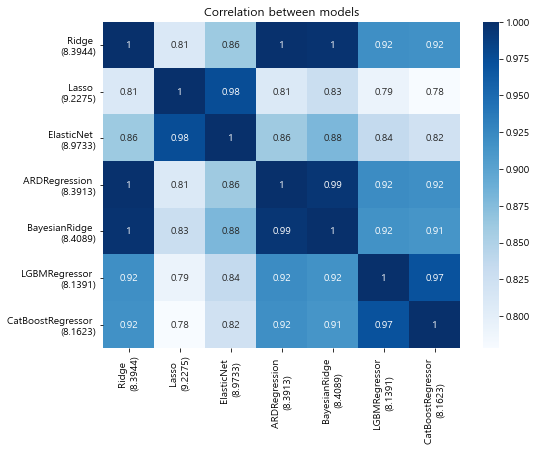

In [19]:
pred_results = []
for name, reg, reg_score in regs_trained:
    pred = list(reg.predict(x_dev))
    name = f'{name} \n({reg_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results = pd.concat(pred_results, axis=1)
ensemble_results = ensemble_results.applymap(lambda x: float(x))

# 모형의 예측값 간의 상관관계를 보기 위해 hitmap을 도식한다.
plt.figure(figsize = (8,6))
g = sns.heatmap(ensemble_results.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

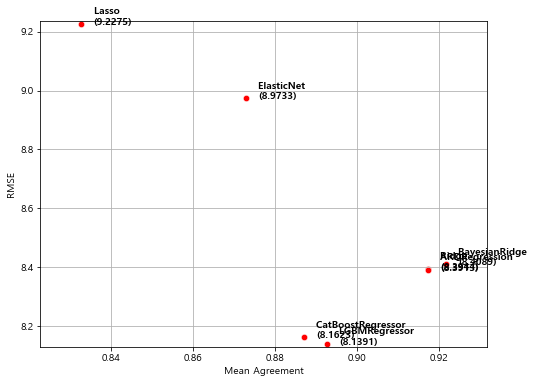

In [20]:
corr = (ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)
names = corr.index
rmse = np.array(corr.index.str[-7:-1]).astype(float)
df = pd.DataFrame({'model': names, 'rmse': rmse, 'cor': corr})        

plt.figure(figsize=(8,6))
g = sns.scatterplot(x="cor", y="rmse", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.003, df.rmse[line]-0.003, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.rmse.min()-0.01,df.rmse.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('RMSE')
plt.grid()
plt.show()

In [21]:
selected = [#'LinearRegression',
            #'Ridge',
            #'Lasso',
            #'ElasticNet',
            'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            #'CatBoostRegressor',
            #'DeepNeuralNetwork'
            ]
models_for_ensemble = [(name,reg) for name,reg,score in regs_trained if name in selected]
results_for_ensemble = []
for name, model in models_for_ensemble:
    results_for_ensemble.append(model.predict(x_dev))
avg = (results_for_ensemble[0]+results_for_ensemble[1])/len(results_for_ensemble)
score = mean_squared_error(avg, y_dev, squared=False)
score

8.168900854762791

In [49]:
selected = [#'LinearRegression',
            #'Ridge',
            #'Lasso',
            #'ElasticNet',
            'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            'CatBoostRegressor',
            #'DeepNeuralNetwork'
            ]
models_for_ensemble = [(name,reg) for name,reg,score in regs_trained if name in selected]
results_for_ensemble = []
weights_avg = []
rmse_best = 1000
for i in tqdm(range(1, 90, 1)):
    for j in range(1, 90, 1):
        for k in range(1, 90, 1):
            if (i+j+k) != 30:
                continue
            pred = (models_for_ensemble[0][1].predict(x_dev).flatten() * i + models_for_ensemble[1][1].predict(x_dev) * j
                    + models_for_ensemble[2][1].predict(x_dev) * k)/(i+j+k)
            rmse = np.sqrt(mean_squared_error(y_dev, pred))
            if rmse < rmse_best:
                weights_avg = [i,j,k]
                rmse_best = rmse 
                print(rmse, i,j,k)            

print(rmse_best, weights_avg)

  0%|                                                                                           | 0/89 [00:00<?, ?it/s]

8.151071166853558 1 1 28
8.145964477262496 1 2 27
8.141190557794713 1 3 26
8.136749994169753 1 4 25
8.132643332441761 1 5 24
8.128871078667059 1 6 23
8.125433698594948 1 7 22
8.122331617382248 1 8 21
8.11956521933192 1 9 20
8.117134847656171 1 10 19
8.115040804264394 1 11 18
8.113283349576196 1 12 17
8.111862702359852 1 13 16
8.110779039596366 1 14 15
8.110032496369355 1 15 14
8.109623165780915 1 16 13
8.109551098893595 1 17 12


  1%|▉                                                                                  | 1/89 [00:26<39:34, 26.98s/it]

8.108675544677032 2 14 14
8.108130568742771 2 15 13
8.10792290827379 2 16 12


  2%|█▊                                                                                 | 2/89 [00:53<38:28, 26.54s/it]

8.107513674114989 3 14 13
8.107170404945585 3 15 12
8.10716450489824 3 16 11


  3%|██▊                                                                                | 3/89 [01:18<36:59, 25.81s/it]

8.107152339588835 4 15 11


100%|██████████████████████████████████████████████████████████████████████████████████| 89/89 [12:31<00:00,  8.44s/it]

8.107152339588835 [4, 15, 11]


In [60]:
w0,w1,w2 = [4, 15, 11]
selected = [#'LinearRegression',
            #'Ridge',
            #'Lasso',
            #'ElasticNet',
            'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            'CatBoostRegressor',
            #'DeepNeuralNetwork'
            ]
models_for_ensemble = [(name,reg) for name,reg,score in regs_trained if name in selected]
results_for_ensemble = []
avg = (models_for_ensemble[0][1].predict(x_dev) * w0 + models_for_ensemble[1][1].predict(x_dev) * w1
                    + models_for_ensemble[2][1].predict(x_dev) * w2)/30

### Deep Neural Network

In [43]:
def reset_seeds(reset_graph_with_backend=None):
    if reset_graph_with_backend is not None:
        K = reset_graph_with_backend
        K.clear_session()
        tf.compat.v1.reset_default_graph()
        print("KERAS AND TENSORFLOW GRAPHS RESET")  # optional

    np.random.seed(16)
    # seed를 잘 설정하면 성능이 더 잘 오른다.
    random.seed(6)
    tf.compat.v1.set_random_seed(16)
#    os.environ['CUDA_VISIBLE_DEVICES'] = ''  # for GPU
    print("RANDOM SEEDS RESET")  # optional
   
reset_seeds()

RANDOM SEEDS RESET


In [44]:
i = int(round(x_train2.shape[0] * 0.8,0))
x_val, y_val = x_train2[i:], y_train2[i:]
x_train3, y_train3 = x_train2[:i], y_train2[:i]

In [45]:
def model_fn(hp):
    inputs = tf.keras.Input(shape=(x_train3.shape[1],))
    x = inputs
    for i in range(hp.Int('num_layers', 2, 4, step=1)):
        x = tf.keras.layers.Dense(hp.Int('unit_'+str(i), 16, 128, step=16),
                               activation=hp.Choice('activation',['relu','tanh']))(x)
        x = tf.keras.layers.Dropout(hp.Float('dropout_'+str(i), 0, 0.5, step=0.25, default=0.5))(x)
    outputs = tf.keras.layers.Dense(1, activation='linear')(x)
    model = tf.keras.Model(inputs, outputs)
    model.compile(loss='mse', 
                  optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), 
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [46]:
# keras tuner는 튜닝 종류가 4종류가 있음: hyperband, grid search, random search, bayesian optimization
tuner = kt.Hyperband(model_fn,
                     objective=kt.Objective('val_root_mean_squared_error', direction="min"), 
                     max_epochs=30,
                     hyperband_iterations=2,
                     overwrite=True,
                     directory='dnn_tuning')
# objective: 튜닝 기준, hyperband_iterations:이거 자체에서 2번 반복
# overwrite: False시, 기존을 근거로 해 재학습 안시킴

tuner.search(x_train3, y_train3, validation_data=(x_val, y_val),
             callbacks=[tf.keras.callbacks.EarlyStopping()])
# 빨리 끝내려고 파라미터 저렇게 설정한 것임

Trial 180 Complete [00h 00m 02s]
val_root_mean_squared_error: 9.171037673950195

Best val_root_mean_squared_error So Far: 8.51854419708252
Total elapsed time: 00h 11m 14s
INFO:tensorflow:Oracle triggered exit


In [47]:
tuner.results_summary(1) # 1= 제일 성능이 좋은 놈

Results summary
Results in dnn_tuning\untitled_project
Showing 1 best trials
Objective(name='val_root_mean_squared_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 2
unit_0: 80
activation: tanh
dropout_0: 0.25
unit_1: 128
dropout_1: 0.25
learning_rate: 0.001
unit_2: 64
dropout_2: 0.5
unit_3: 112
dropout_3: 0.25
tuner/epochs: 30
tuner/initial_epoch: 10
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 517c8f812410d3bf7a7d9726cdbe1583
Score: 8.51854419708252


In [48]:
# Loss & RMSE
dnn = tuner.get_best_models(1)[0] # best model 중 가장 좋은 모델
dnn.evaluate(x_dev, y_dev)

203/203 [==============================] - 0s 901us/step - loss: 78.7629 - root_mean_squared_error: 8.8551


[72.3906478881836, 8.508269309997559]

In [ ]:
8.8752

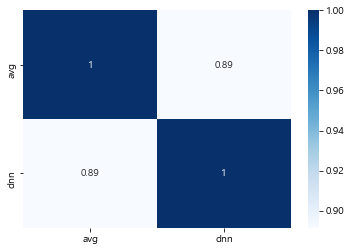

In [63]:
sns.heatmap(pd.DataFrame({'avg':avg,'dnn':dnn.predict(x_dev).flatten()}).corr(),annot=True,cmap='Blues')
plt.show()

In [62]:
weights_avg = []
rmse_best = 1000
for i in tqdm(range(1, 100, 1)):
    for j in range(1, 100, 1):
        if (i+j) != 100:
            continue
        pred = (avg *i+ dnn.predict(x_dev).flatten() * j)/100
        rmse = np.sqrt(mean_squared_error(y_dev, pred))
        if rmse < rmse_best:
            weights_avg = [i,j]
            rmse_best = rmse 
            print(rmse, i,j)            

print(rmse_best, weights_avg)

  2%|█▋                                                                                 | 2/99 [00:00<00:15,  6.12it/s]

8.499017012041538 1 99
8.489861573008628 2 98


  4%|███▎                                                                               | 4/99 [00:00<00:15,  6.08it/s]

8.480804312679808 3 97
8.471845549634498 4 96


  6%|█████                                                                              | 6/99 [00:00<00:15,  6.09it/s]

8.46298554308552 5 95
8.45422470516648 6 94


  8%|██████▋                                                                            | 8/99 [00:01<00:15,  6.05it/s]

8.445563258004615 7 93
8.437001548422034 8 92


 10%|████████▎                                                                         | 10/99 [00:01<00:15,  5.76it/s]

8.42853986370492 9 91
8.420178516747304 10 90


 12%|█████████▉                                                                        | 12/99 [00:02<00:15,  5.65it/s]

8.411917802531809 11 89
8.403758014586643 12 88


 14%|███████████▌                                                                      | 14/99 [00:02<00:14,  5.78it/s]

8.395699481062149 13 87
8.38774244270312 14 86


 15%|████████████▍                                                                     | 15/99 [00:02<00:14,  5.69it/s]

8.379887182416567 15 85


 17%|██████████████                                                                    | 17/99 [00:02<00:14,  5.64it/s]

8.37213404763351 16 84
8.36448328532807 17 83


 19%|███████████████▋                                                                  | 19/99 [00:03<00:14,  5.61it/s]

8.356935169176639 18 82
8.349489989692476 19 81


 21%|█████████████████▍                                                                | 21/99 [00:03<00:14,  5.54it/s]

8.342148030912428 20 80
8.334909557084151 21 79


 23%|███████████████████                                                               | 23/99 [00:03<00:13,  5.70it/s]

8.327774840741933 22 78
8.320744129808368 23 77


 25%|████████████████████▋                                                             | 25/99 [00:04<00:13,  5.66it/s]

8.313817695729396 24 76
8.306995832813737 25 75


 27%|██████████████████████▎                                                           | 27/99 [00:04<00:12,  5.58it/s]

8.30027875030116 26 74
8.29366672566764 27 73


 29%|████████████████████████                                                          | 29/99 [00:05<00:12,  5.78it/s]

8.28716002987776 28 72
8.280758879898315 29 71


 31%|█████████████████████████▋                                                        | 31/99 [00:05<00:11,  5.70it/s]

8.274463529289154 30 70
8.268274209081152 31 69


 33%|███████████████████████████▎                                                      | 33/99 [00:05<00:11,  5.66it/s]

8.26219119562895 32 68
8.256214686980679 33 67


 35%|████████████████████████████▉                                                     | 35/99 [00:06<00:10,  5.92it/s]

8.250344929852627 34 66
8.244582158478897 35 65


 37%|██████████████████████████████▋                                                   | 37/99 [00:06<00:10,  5.66it/s]

8.238926571076478 36 64
8.233378408674106 37 63


 39%|████████████████████████████████▎                                                 | 39/99 [00:06<00:10,  5.57it/s]

8.227937892676534 38 62
8.222605229994361 39 61


 41%|█████████████████████████████████▉                                                | 41/99 [00:07<00:10,  5.59it/s]

8.21738063904266 40 60
8.212264298037436 41 59


 43%|███████████████████████████████████▌                                              | 43/99 [00:07<00:09,  5.77it/s]

8.20725642801349 42 58
8.202357238000637 43 57


 45%|█████████████████████████████████████▎                                            | 45/99 [00:07<00:09,  5.61it/s]

8.197566913801898 44 56
8.192885649566943 45 55


 47%|██████████████████████████████████████▉                                           | 47/99 [00:08<00:09,  5.71it/s]

8.188313614436108 46 54
8.183851018756412 47 53


 49%|████████████████████████████████████████▌                                         | 49/99 [00:08<00:08,  5.96it/s]

8.17949803063995 48 52
8.175254807717018 49 51


 52%|██████████████████████████████████████████▏                                       | 51/99 [00:08<00:08,  5.99it/s]

8.171121548392813 50 50
8.167098403489362 51 49


 54%|███████████████████████████████████████████▉                                      | 53/99 [00:09<00:08,  5.74it/s]

8.163185552355879 52 48
8.159383124268846 53 47


 56%|█████████████████████████████████████████████▌                                    | 55/99 [00:09<00:07,  5.76it/s]

8.155691290385658 54 46
8.152110202228563 55 45


 58%|███████████████████████████████████████████████▏                                  | 57/99 [00:09<00:07,  5.91it/s]

8.148640001982104 56 44
8.145280852032366 57 43


 60%|████████████████████████████████████████████████▊                                 | 59/99 [00:10<00:06,  5.81it/s]

8.142032850805961 58 42
8.138896161979947 59 41


 62%|██████████████████████████████████████████████████▌                               | 61/99 [00:10<00:06,  5.60it/s]

8.135870904604486 60 40
8.132957212932068 61 39


 64%|████████████████████████████████████████████████████▏                             | 63/99 [00:10<00:06,  5.71it/s]

8.130155180032306 62 38
8.12746494868535 63 37


 66%|█████████████████████████████████████████████████████▊                            | 65/99 [00:11<00:05,  5.68it/s]

8.12488661911446 64 36
8.12242029596573 65 35


 68%|███████████████████████████████████████████████████████▍                          | 67/99 [00:11<00:05,  5.68it/s]

8.120066081279049 66 34
8.117824076445284 67 33


 70%|█████████████████████████████████████████████████████████▏                        | 69/99 [00:12<00:05,  5.50it/s]

8.115694375244537 68 32
8.113677062481825 69 31


 71%|█████████████████████████████████████████████████████████▉                        | 70/99 [00:12<00:05,  5.47it/s]

8.111772231110834 70 30


 73%|███████████████████████████████████████████████████████████▋                      | 72/99 [00:12<00:05,  5.33it/s]

8.109979938569223 71 29
8.108300283061883 72 28


 75%|█████████████████████████████████████████████████████████████▎                    | 74/99 [00:12<00:04,  5.45it/s]

8.106733322174303 73 27
8.105279131677232 74 26


 77%|██████████████████████████████████████████████████████████████▉                   | 76/99 [00:13<00:04,  5.69it/s]

8.103937757866817 75 25
8.1027092716587 76 24


 79%|████████████████████████████████████████████████████████████████▌                 | 78/99 [00:13<00:03,  5.61it/s]

8.101593705779909 77 23
8.100591118057299 78 22


 81%|██████████████████████████████████████████████████████████████████▎               | 80/99 [00:14<00:03,  5.53it/s]

8.099701555628288 79 21
8.09892504950954 80 20


 83%|███████████████████████████████████████████████████████████████████▉              | 82/99 [00:14<00:03,  5.55it/s]

8.098261634469118 81 19
8.097711337562375 82 18


 85%|█████████████████████████████████████████████████████████████████████▌            | 84/99 [00:14<00:02,  5.73it/s]

8.097274177190776 83 17
8.096950176475145 84 16


 87%|███████████████████████████████████████████████████████████████████████▏          | 86/99 [00:15<00:02,  5.63it/s]

8.096739351287606 85 15
8.096641701559442 86 14


100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [00:17<00:00,  5.74it/s]

8.096641701559442 [86, 14]


### Deployment

In [72]:
w0,w1,w2 = [4, 15, 11]
selected = [#'LinearRegression',
            #'Ridge',
            #'Lasso',
            #'ElasticNet',
            'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            'CatBoostRegressor',
            #'DeepNeuralNetwork'
            ]
models_for_ensemble = [(name,reg) for name,reg,score in regs_trained if name in selected]
results_for_ensemble = []
avg = (models_for_ensemble[0][1].predict(x_dev) * w0 + models_for_ensemble[1][1].predict(x_dev) * w1
                    + models_for_ensemble[2][1].predict(x_dev) * w2)/(w0+w1+w2)
w0,w1 = weights_avg
pred = (w0*avg+w1*dnn.predict(x_dev).flatten())/(w0+w1)
pd.DataFrame({'age':pred}).to_csv('2등feature모델링_dev.csv', index=False)

In [73]:
w0,w1,w2 = [11, 40, 39]
selected = [#'LinearRegression',
            #'Ridge',
            #'Lasso',
            #'ElasticNet',
            'ARDRegression',
            #'BayesianRidge',
            #'RandomForestRegressor',
            #'XGBRegressor',
            'LGBMRegressor',
            'CatBoostRegressor',
            #'DeepNeuralNetwork'
            ]
models_for_ensemble = [(name,reg) for name,reg in regs_trained_for_submissions if name in selected]
results_for_ensemble = []
avg = (models_for_ensemble[0][1].predict(x_test) * w0 + models_for_ensemble[1][1].predict(x_test) * w1
                    + models_for_ensemble[2][1].predict(x_test) * w2)/(w0+w1+w2)
w0,w1 = weights_avg
pred = (w0*avg+w1*dnn.predict(x_test).flatten())/(w0+w1)
pd.DataFrame({'custid': test_id, 'age':pred}).to_csv('2등feature모델링.csv', index=False)